# Lab 5

Load libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
# shuffle
df = df.sample(frac=1)

Gradient descent implementation

In [4]:
def linear_cost(X, y, theta, lam):
    h = X @ theta
    regul = (lam/(2*X.shape[0])) * np.sum(theta**2)
    return ((h - y) ** 2).sum() / (2*len(X)) + regul

def linear_cost_gradient(X, y, theta, lam):
    h = X @ theta
    regul = lam * theta
    return (((h - y).T @ X).T + regul)/ X.shape[0]

def gradient_descent(
    X, y, theta_0, 
    cost_function, cost_function_gradient,
    learning_rate, threshold,
    max_iter=1000, lam=5
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(X, y, theta, lam)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(X, y, theta, lam)
        costs.append(cost_function(X, y, theta, lam))
        thetas.append(theta.copy())

    return theta, costs, thetas

Split data

In [5]:
df['ones'] = np.ones(len(df))
X = np.array(df.iloc[:,1:8].copy())
y = np.array(df.iloc[:,[8]].copy())

In [6]:
X_train = X[:300]
X_cv = X[301:350]
X_test = X[351:400]
y_train = y[:300]
y_cv = y[301:350]
y_test = y[351:400]

In [7]:
m, n = X.shape
theta_0 = np.random.rand(n,1)
print(theta_0)

[[0.74027708]
 [0.03447495]
 [0.71897284]
 [0.92897777]
 [0.77668506]
 [0.03785202]
 [0.48150677]]


### Polynomial degree 1

In [8]:
r_theta_tr, costs_tr, thetas_tr = gradient_descent(X_train, y_train, theta_0, linear_cost, linear_cost_gradient, 0.00001, 0.001, 3)
r_theta_tr

array([[ 0.04306357],
       [-0.20221356],
       [ 0.71208834],
       [ 0.92149365],
       [ 0.76906429],
       [ 0.01892348],
       [ 0.48028171]])

Text(0.5, 1.0, 'Costs (train): polynomial degree 1')

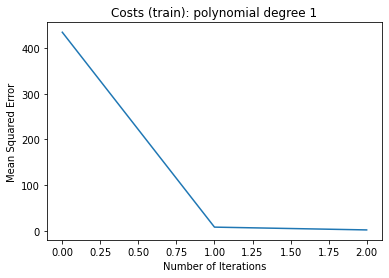

In [9]:
plt.plot(costs_tr)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Costs (train): polynomial degree 1')

In [10]:
print('Train cost: ', round(costs_tr[-1], 3))

Train cost:  1.75


In [11]:
print('Test cost: ', round(linear_cost(X_test, y_test, r_theta_tr, 10), 3), ' cv cost: ', round(linear_cost(X_cv, y_cv, r_theta_tr, 10), 3))

Test cost:  2.037  cv cost:  1.664


### Polynomial degree 2

In [12]:
r_theta_tr2, costs_tr2, thetas_tr2 = gradient_descent(X_train**2, y_train, theta_0, linear_cost, linear_cost_gradient, 0.0000000001, 0.01, 3)
r_theta_tr2

array([[ 0.02331697],
       [-0.20446229],
       [ 0.71208627],
       [ 0.92149129],
       [ 0.76906184],
       [ 0.01890901],
       [ 0.4802816 ]])

Text(0.5, 1.0, 'Costs (train): polynomial degree 2')

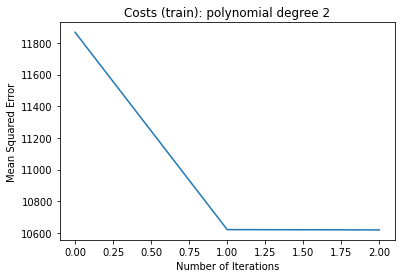

In [13]:
plt.plot(costs_tr2)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Costs (train): polynomial degree 2')

In [14]:
print('Train cost: ', round(costs_tr2[-1], 3))

Train cost:  10618.47


In [15]:
print('Test cost: ', round(linear_cost(X_test**2, y_test, r_theta_tr2, 3), 2), ' cv cost: ', round(linear_cost(X_cv**2, y_cv, r_theta_tr2, 3), 2))

Test cost:  16611.43  cv cost:  8711.33


### Polynomial degree 3

In [16]:
r_theta_tr3, costs_tr3, thetas_tr3 = gradient_descent(X_train**3, y_train, theta_0, linear_cost, linear_cost_gradient, 0.000000000000001, 0.01, 3)
r_theta_tr3

array([[ 0.00807795],
       [-0.20505418],
       [ 0.71208625],
       [ 0.92149127],
       [ 0.76906181],
       [ 0.0189087 ],
       [ 0.4802816 ]])

Text(0.5, 1.0, 'Costs (train): polynomial degree 3')

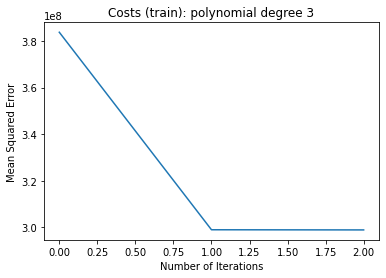

In [17]:
plt.plot(costs_tr3)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Costs (train): polynomial degree 3')

In [18]:
print('Train cost: ', round(costs_tr3[-1], 2))

Train cost:  298828949.97


In [19]:
print('Test cost: ', round(linear_cost(X_test**3, y_test, r_theta_tr3, 3), 2), ' cv cost: ', round(linear_cost(X_cv**3, y_cv, r_theta_tr3, 3), 2))

Test cost:  465827316.02  cv cost:  246140951.4


Comparing the three variations of degree in models, we observe that the one with less costs is the model with degree 1. This doesn't necessarily means that more degrees imply more costs

### Adjust lambda

In [20]:
print('Before ', costs_tr[-1])

Before  1.7498141610082054


In [21]:
r_theta_lam, costs_lam, thetas_lam = gradient_descent(X_train, y_train, theta_0, linear_cost, linear_cost_gradient, 0.00001, 0.001, 1000)
print('After ', costs_lam[-1])

After  1.6014614943120282


Even though we manipulate the lambda parameter a lot, at one point it contributes to a non-significant decrease in the cost of the error in the function. 

* I consider that a lambda of **5** is enough to prevent variance and not cause bias in the model.
* The best performance belong to the model with degree 1